In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
%matplotlib inline
import pylab
import scipy.interpolate as sp
from numpy import pi
from numpy import array

In [48]:
text_file1 = np.loadtxt('hoverrNoCommas.txt', dtype = 'float')

# h vs. a

In [49]:
a = text_file1[:,0]
ratio = text_file1[:,1]
ratio1 = 10**ratio
a1 = 10**a
height = (ratio1*a1)*2
a1_in_rg = a1*2

h_=np.zeros((38,2))
h_[:,0]= a1_in_rg
h_[:,1] = height


# h/a vs. a

In [50]:
#logPlot = plt.gca()
#plt.plot = (a,ratio)
a = text_file1[:,0]
ratio = text_file1[:,1]
#plt.plot(a1,ratio1) # Sets each column as the x and y coordinates, and creates and shows a plot.
#plt.xlabel('log a [Rs]',fontsize=20)
#plt.ylabel('log h/a',fontsize=18)
#plt.savefig('hovera1.png', dpi=300, bbox_inches='tight')

# h vs a adjusted

In [51]:
c = 6.67e-11*2*1.99e30*10**8
#d = text_file1[:,0]
#distance2= 10**d

distance_in_meters = a1*(2*c)
speed_of_light_squared=(3e8)**2
distance = (distance_in_meters/speed_of_light_squared)

distance_in_rg = distance/(1.5*10**11)
velocity = (c/distance)**(1/2.0)*10**(-3)


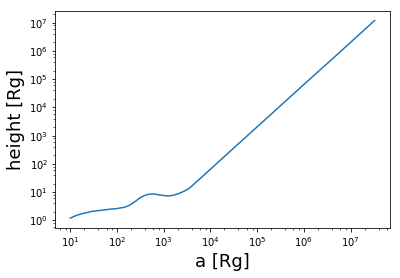

In [52]:
logPlot = plt.gca()
logPlot.loglog(distance_in_rg,height)
plt.xlabel('a [Rg]',fontsize=18)
plt.ylabel('height [Rg]',fontsize=18)
#plt.plot([2.55675200e+00,  4.50238131e+01], [ 5.97419825e-01,1.63274396e+00], c='r')
#plt.plot([4.50238131e+01,1.14109211e+02], [1.63274396e+00,4.09214110e+00], c='y')
#plt.plot([1.14109211e+02,3.69555994e+02], [4.09214110e+00, 3.73721635e+00 ], c='g')
#plt.plot([3.69555994e+02,9.16892670e+02],[4.09214110e+00,6.98714721e+00], color='orange')
#plt.plot([9.16892670e+02,8.32494014e+06],[6.98714721e+00, 6.01085228e+06], c='b' )
plt.savefig('hovera.png', dpi=300, bbox_inches='tight')

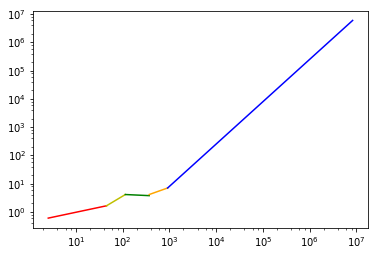

In [53]:
logPlot = plt.gca()
logPlot.loglog([2.55675200e+00,  4.50238131e+01], [ 5.97419825e-01,1.63274396e+00], c='r')
logPlot.loglog([4.50238131e+01,1.14109211e+02], [1.63274396e+00,4.09214110e+00], c='y')
logPlot.loglog([1.14109211e+02,3.69555994e+02], [4.09214110e+00, 3.73721635e+00 ], c='g')
logPlot.loglog([3.69555994e+02,9.16892670e+02],[4.09214110e+00,6.98714721e+00], color='orange')
logPlot.loglog([9.16892670e+02,8.32494014e+06],[6.98714721e+00, 6.01085228e+06], c='b')

# Surf.density vs a

In [54]:
text_file2 = np.loadtxt('SurfaceDensity.txt', dtype = 'float')
a2 = text_file2[:,0]
surface_density = text_file2[:,1]

In [55]:
unlog_sd = 10**text_file2[:,1]
unlog_a2 = (10**a2)*2

In [56]:
def m(x1,x2,y1,y2):
    slope=(y2-y1)/(x2-x1)
    return slope
def b(x1,x2,y1,y2):
    yint=y1-(m(x1,x2,y1,y2)*x1)
    return yint

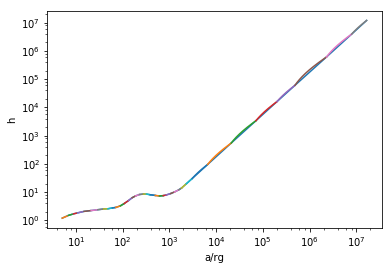

In [57]:
logPlot=plt.gca()
logPlot.loglog(a1_in_rg,height)
logPlot.set_xlabel('a/rg') 
logPlot.set_ylabel('h')
for i in range(len(h_)-1):
    j=i+1
    rad = np.arange(h_[i,0],h_[j,0],h_[j,0]/h_[i,0])
    h_p= (m(h_[i,0],h_[j,0],h_[i,1],h_[j,1])*rad)+b(h_[i,0],h_[j,0],h_[i,1],h_[j,1])

    logPlot=plt.gca()
    logPlot.loglog(rad,h_p)
    

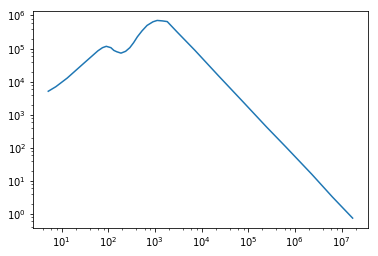

In [58]:
logPlot=plt.gca()
logPlot.loglog(unlog_a2,unlog_sd)

# This is velocity vs. distance

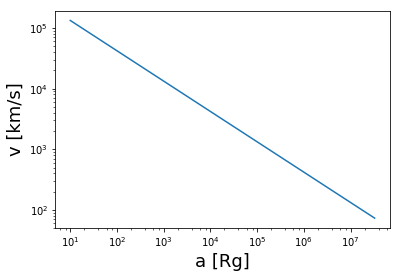

In [59]:
logPlot=plt.gca()
logPlot.loglog(distance_in_rg,velocity)
plt.xlabel('a [Rg]',fontsize=18)
plt.ylabel('v [km/s]',fontsize=18)
plt.savefig('velocity.png', dpi=300, bbox_inches='tight')

# T Orbit vs. Distance

In [60]:
T_Orb = (2*np.pi*distance_in_rg*1.5*10**8)/velocity

[  7.14336614e+04   1.13690707e+05   1.64853070e+05   2.31734595e+05
   3.57447648e+05   6.04881166e+05   9.92419501e+05   1.53052509e+06
   2.08542669e+06   2.93128603e+06   3.75472775e+06   5.27877819e+06
   6.97750247e+06   9.51426805e+06   1.25781965e+07   1.61172686e+07
   2.12986001e+07   2.90225853e+07   3.60381786e+07   4.75968209e+07
   6.89747653e+07   9.39621653e+07   1.24133894e+08   1.54167747e+08
   2.16737073e+08   2.86428179e+08   3.90473708e+08   4.85118409e+08
   6.82496933e+08   1.05387320e+09   3.32263831e+09   1.88914047e+10
   1.17886713e+11   5.56386557e+11   2.11316354e+12   2.16651929e+13
   1.39462256e+14   4.19702622e+14]


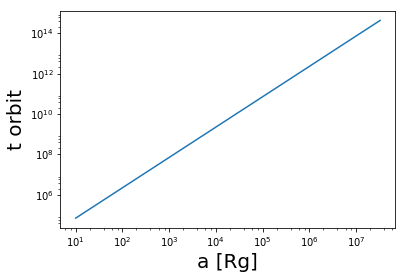

In [61]:
logPlot=plt.gca()
logPlot.loglog(distance_in_rg,T_Orb)
plt.xlabel('a [Rg]',fontsize=20)
plt.ylabel('t orbit',fontsize=20)

print T_Orb

# Time in disk vs Distance

In [62]:
t_in_disk = (ratio1*T_Orb)/2*np.pi

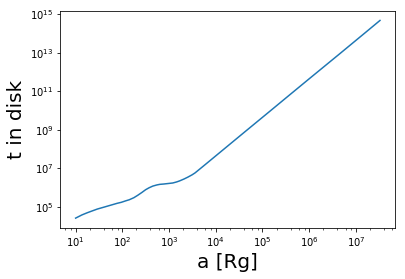

In [63]:
logPlot=plt.gca()
logPlot.loglog(distance_in_rg,t_in_disk)
plt.xlabel('a [Rg]',fontsize=20)
plt.ylabel('t in disk',fontsize=20)

In [64]:
t_over_T = t_in_disk/T_Orb
print t_over_T

[ 0.36703789  0.33751006  0.29766089  0.25979054  0.21744196  0.16392309
  0.12618981  0.10024042  0.08303282  0.07096934  0.06259404  0.05696337
  0.05695536  0.05876077  0.0619053   0.06061679  0.0563313   0.04764719
  0.04115529  0.03235474  0.02388846  0.0185846   0.01588502  0.01445699
  0.01301968  0.01229044  0.011847    0.0119702   0.01335671  0.01537795
  0.02262756  0.04059883  0.07437884  0.12534996  0.19534144  0.41634738
  0.77887107  1.13416127]


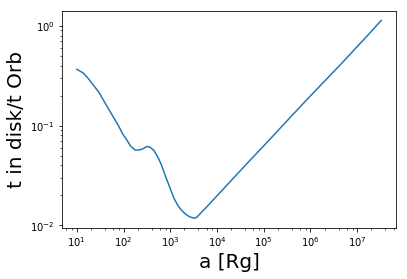

In [65]:
logPlot=plt.gca()
logPlot.loglog(distance_in_rg,t_over_T)
plt.xlabel('a [Rg]',fontsize=20)
plt.ylabel('t in disk/t Orb',fontsize=20)

In [66]:
def slope(dx, dy):
    return (dy / dx) if dx else None

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return '({}, {})'.format(self.x, self.y)

    def __repr__(self):
        return 'Point({}, {})'.format(self.x, self.y)

    def halfway(self, target):
        midx = (self.x + target.x) / 2
        midy = (self.y + target.y) / 2
        return Point(midx, midy)

    def distance(self, target):
        dx = target.x - self.x
        dy = target.y - self.y
        return (dx*dx + dy*dy) ** 0.5

    def reflect_x(self):
        return Point(-self.x,self.y)

    def reflect_y(self):
        return Point(self.x,-self.y)

    def reflect_x_y(self):
        return Point(-self.x, -self.y)

    def slope_from_origin(self):
        return slope(self.x, self.y)

    def slope(self, target):
        return slope(target.x - self.x, target.y - self.y)

    def y_int(self, target):       # <= here's the magic
        return self.y - self.slope(target)*self.x

    def line_equation(self, target):
        slope = self.slope(target)

        y_int = self.y_int(target)
        if y_int < 0:
            y_int = -y_int
            sign = '-'
        else:
            sign = '+'

        return '{}x {} {}'.format(slope, sign, y_int)

    def line_function(self, target):
        slope = self.slope(target)
        y_int = self.y_int(target)
        def fn(x):
            return slope*x + y_int
        return fn

In [67]:
d_rg = np.array(distance_in_rg)
d_rg1 = d_rg[:36]
h_a2 = ratio1[:36]
h_=np.zeros((38,2))
h_[:,0]=d_rg
h_[:,1]=height

def hint(a):
    for i in range(len(d_rg)-1):
        j=i+1
        c = Point(d_rg[i],height[i])
        d = Point(d_rg[j],height[j])
        c_36 = Point(d_rg[36],height[36])
        d_37 = Point(d_rg[37],height[37])
        if ((a>=d_rg[i]) and (a<d_rg[j])):
            return (slope(d_rg[j]-d_rg[i],height[j]-height[i])*a)+(Point.y_int(c,d))
        elif ((a==d_rg[37])):
            return height[37]
        elif ((a>d_rg[37]) and (a<=unlog_a2[29])):
            return (slope(harg[37]-d_rg[36],height[37]-height[36])*a)+(Point.y_int(c_36,d_37))
    else:
        return a*0

In [68]:
sden_=np.zeros((30,2))
sden_[:,0]=unlog_a2
sden_[:,1]=unlog_sd

def S_int(a):    
    for i in range(len(unlog_a2)-1):
        j=i+1
        c = Point(unlog_a2[i],unlog_sd[i])
        d = Point(unlog_a2[j],unlog_sd[j])
        c_0 = Point(unlog_a2[0],unlog_sd[0])
        d_1 = Point(unlog_a2[1],unlog_sd[1])
        if ((a>=d_rg[0]) and (a<unlog_a2[0])):
            return (slope(unlog_a2[1]-unlog_a2[0],unlog_sd[1]-unlog_sd[0])*a)+(Point.y_int(c_0,d_1))
        elif ((a>=unlog_a2[i]) and (a<unlog_a2[j])):
            return (slope(unlog_a2[j]-unlog_a2[i],unlog_sd[j]-unlog_sd[i])*a)+(Point.y_int(c,d))
        elif ((a==unlog_a2[29])):
            return unlog_sd[29]
    else:
        return a*0

In [69]:
denint1=[]
for i in range(len(d_rg1)):
    denint1.append(S_int(d_rg1[i]))

In [70]:
#creating a list of values for interpolated thickness hint
h_int1=[]
for i in range(len(d_rg1)):
    h_int1.append(hint(d_rg[i]))

In [71]:
def Density(a):
    Dcal=S_int(a)/(hint(a)*1.5e+11/100)
    return Dcal
den1=[]
for i in range(len(d_rg1)):
    den1.append(Density(d_rg[i]))

In [72]:
mass = 1.99e+30
Force = 0.5*6.088e+18/mass
h_a2 = h_a2

In [73]:
def i_crit(h_a2):
    icrit = np.arcsin(h_a2/2)
    return icrit

def Speed(d_rg1): # In m/s
    speed = (c/(d_rg1*1.5e+11))**(1/2.0)
    return speed         


def vRely(d_rg1,i_):
    y = (Speed(d_rg1)*np.sin(i_))**2
    return y

def Torb(d_rg):
    orbit = (2*np.pi*d_rg*1.5*10**11)/Speed(d_rg)
    return orbit

def Density(d_rg):
    sigma = (SurfaceDensity(d_rg)/(Height(d_rg)*1.5e+11))*10**(3)
    return sigma

def dvy(distance_in_rg,height):
    dVy = Force*Density(distance_in_rg)*Torb(distance_in_rg)*vRely(distance_in_rg, i_crit)
    return dvy

In [74]:
crit = array(i_crit(h_a2))

i_ = np.pi/4,np.pi/3,np.pi/6,np.pi/2
i_2 = np.array([np.pi/6,np.pi/3,np.pi/4,np.pi/2])
#for j in h_a1:
    #for k in T_orb:
        #print TinD(j,i,k)

In [75]:
 
vRel = np.array([8.80022778e+09,6.45573767e+09,5.03923364e+09,4.01576791e+09,3.00806736e+09,2.11827567e+09,1.52276304e+09,1.14078084e+09,9.28180776e+08,7.39702446e+08,6.27157883e+08,4.99735550e+08,4.14918235e+08,3.37426302e+08,2.80123968e+08,2.37447841e+08,1.97179524e+08,1.60424905e+08,1.38863241e+08,1.15356983e+08,9.00815187e+07,7.33039161e+07,6.08838724e+07,5.26946880e+07,4.19894692e+07,   3.48673301e+07,   2.83596798e+07,2.45394044e+07,1.95446869e+07,1.46297515e+07,6.80414889e+06,2.13592674e+06,6.30162587e+05,2.23963941e+05,9.20040858e+04,1.94948911e+04])

In [76]:
from numpy import cos,sin,arcsin
G = 6.67e-11*2*1.99e30 
h_a1 = np.array(ratio1)
h_a2 = h_a1[:36]
T_orb = np.array(T_Orb*10)
T_Orb1 = T_Orb[:36]
d_rg = np.array(distance_in_rg)
d_km = d_rg1*1.5e+08
r_sun = 6.96e+05
r_mstar = r_sun*0.4
r_redg = r_sun*100
r_Ostar = r_sun*15
Rho = np.array([5.3226935186600863e-06, 5.9765213777357602e-06, 7.3723339743839646e-06, 8.9401791325524744e-06, 1.1261482733997499e-05, 1.6537256918830009e-05, 2.2958058745336347e-05, 2.8447457382521977e-05, 2.9789327173609211e-05, 2.4360195526836645e-05, 1.9631323393403089e-05, 1.5258155544719618e-05, 1.3164486515251008e-05, 1.2516041752612994e-05, 1.3132150172415993e-05, 1.5853404839341584e-05, 2.0749437020210494e-05, 2.8503995674408276e-05, 3.5631581153442283e-05, 4.5908329827371274e-05, 5.8324157677768756e-05, 6.4289903174157269e-05, 6.1009785104746573e-05, 5.6465307937633348e-05, 4.3071360566015997e-05, 2.9500064694192425e-05, 1.7382078903172469e-05, 1.3622937589455536e-05, 8.0137896736367608e-06, 3.3750627357713892e-06, 4.2420449746897986e-07, 1.3387213182609257e-08, 3.3489405588841745e-10, 1.2663886985936325e-11, 9.7054086404354802e-13, 9.6583820155355247e-15])
Density_Ratio = np.array(Rho/1410)
Density_mstar = np.array(Rho/8806)
Density_Ostar = np.array(Rho/27.833)
Density_RG = np.array(Rho/0.0281)
Rbondi = np.array((G*10)/((vRel+100)*1000))/1000
Dbondi = np.array(mass*10/(4/3*np.pi*(Rbondi)**3))
Density_sBH = np.array((Rho/Dbondi)*1000)
                        
def TinD(h_a2,i_):
    t_in_d = np.arcsin(h_a2*1/(2*sin(i_))/np.pi)
    return t_in_d

In [77]:
def inv_n(Density_Ratio,d_km,h_a2,i_):
    n_orb = (3*np.pi/4)*(Density_Ratio)*(d_km/r_sun)*sin(i_)*TinD(h_a2,i_)
    return n_orb
def inv_n1(Density_mstar,d_km,h_a2,i_):
    n_orb1 = (3*np.pi/4)*(Density_mstar)*(d_km/r_mstar)*sin(i_)*TinD(h_a2,i_)
    return n_orb1
def inv_n2(Density_Ostar,d_km,h_a2,i_):
    n_orb2 = (3*np.pi/4)*(Density_Ostar)*(d_km/r_Ostar)*sin(i_)*TinD(h_a2,i_)
    return n_orb2
def inv_n3(Density_RG,d_km,h_a2,i_):
    n_orb3 = (3*np.pi/4)*(Density_RG)*(d_km/r_redg)*sin(i_)*TinD(h_a2,i_)
    return n_orb3
def inv_nB(Density_sBH,d_km,Rbondi,h_a2,i_):
    n_orbB = (3*np.pi/4)*(Density_sBH)*(d_km/Rbondi)*sin(i_)*TinD(h_a2,i_)
    return n_orbB

In [78]:
def TgrindPi(Density_Ratio,d_km,h_a2,i_,T_Orb1):
    Tg = inv_n(Density_Ratio,d_km,h_a2,i_)**(-1)*T_Orb1/3.154e+7
    return Tg
def Tgrindm(Density_mstar,d_km,h_a2,i_,T_Orb1):
    Tgm = inv_n1(Density_mstar,d_km,h_a2,i_)**(-1)*T_Orb1/3.154e+7
    return Tgm
def TgrindO(Density_Ostar,d_km,h_a2,i_,T_Orb1):
    TgO = inv_n2(Density_Ostar,d_km,h_a2,i_)**(-1)*T_Orb1/3.154e+7
    return TgO
def TgrindRG(Density_RG,d_km,h_a2,i_,T_Orb1):
    TgRG = inv_n3(Density_RG,d_km,h_a2,i_)**(-1)*T_Orb1/3.154e+7
    return TgRG
def TgrindsBH(Density_sBH,d_km,Rbondi,h_a2,i_,T_Orb1):
    Tgs = inv_nB(Density_sBH,d_km,Rbondi,h_a2,i_)**(-1)*T_Orb1/3.154e+7
    return Tgs 

In [79]:
TGrindPi4 = np.array([3.15813297e+03,3.57143347e+03,3.71603122e+03,3.93338028e+03,4.31089194e+03,4.64071980e+03,5.12177931e+03,6.01198328e+03,7.68392520e+03,1.23149483e+04,1.88166937e+04,2.98021414e+04,3.79136480e+04,4.28618620e+04,4.25574554e+04,3.91034530e+04,3.52799880e+04,3.36618417e+04,3.35091330e+04,3.62967044e+04,4.37889822e+04,5.66056741e+04,7.65739892e+04,9.77185413e+04,1.59353260e+05,2.70470657e+05,5.28030528e+05,7.16829526e+05,1.22368039e+06,2.91689700e+06,2.31270105e+07,7.28988821e+08,2.92838888e+10,7.70755271e+11,1.00681959e+13,1.03072206e+15])   

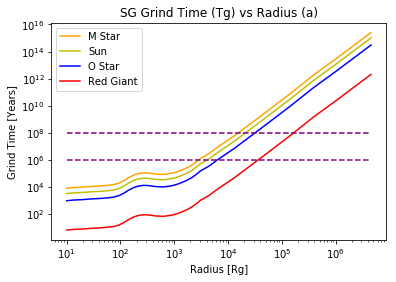

In [80]:
TenSix=[]
for j in range(len(d_rg1)):
    TenSix.append(10**6)
TenEight=[]
for j in range(len(d_rg1)):
    TenEight.append(10**8)

logPlot = plt.gca()
logPlot.loglog(d_rg1,Tgrindm(Density_mstar,d_km,h_a2,np.pi/4,T_Orb1), c= 'orange', label='M Star')
logPlot.loglog(d_rg1,TgrindPi(Density_Ratio,d_km,h_a2,np.pi/4,T_Orb1),c ='y',label = 'Sun')
logPlot.loglog(d_rg1,TgrindO(Density_Ostar,d_km,h_a2,np.pi/4,T_Orb1), c= 'b', label='O Star')
logPlot.loglog(d_rg1,TgrindRG(Density_RG,d_km,h_a2,np.pi/4,T_Orb1), c='r', label = 'Red Giant')
logPlot.loglog(d_rg1,TenSix,'r--',c='purple')
logPlot.loglog(d_rg1,TenEight,'r--',c='purple')
plt.title('SG Grind Time (Tg) vs Radius (a)')
plt.legend()
plt.xlabel('Radius [Rg]')
plt.ylabel('Grind Time [Years]')
ax = plt.subplot(111)
plt.savefig('Final.pdf', dpi=300, bbox_inches='tight')

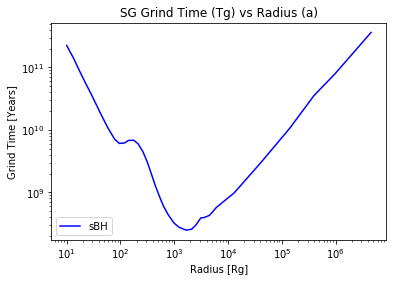

In [81]:
logPlot = plt.gca()
logPlot.loglog(d_rg1,TgrindsBH(Density_sBH,d_km,Rbondi,h_a2,np.pi/4,T_Orb1),c ='b',label = 'sBH')
plt.legend()
plt.xlabel('Radius [Rg]')
plt.ylabel('Grind Time [Years]')
ax = plt.subplot(111)
plt.savefig('sBH.pdf', dpi=300, bbox_inches='tight')
plt.title('SG Grind Time (Tg) vs Radius (a)')

In [82]:
def imin(d_rg1,h_int1): #radians
    i_min=arcsin(h_int1/(2*d_rg1))
    return i_min

def ivals(d_rg1,h_int1):
    prograde=np.linspace(imin(d_rg1,h_int1),pi/2,40)
    return prograde
e2Rg = 2.13267722e+02
e3Rg = 1.45340076e+03
e4Rg = 1.30051044e+04
e5Rg = 1.40421962e+05
e6Rg = 4.53906956e+06

In [83]:
#logPlot = plt.gca()
#logPlot.semilogy(ivals(e4Rg,hint(e4Rg)),TgrindPi((1410/1.73820789e-05),r_sun/1.95076566e+12,0.00762046,ivals(e4Rg,hint(e4Rg)),3.32263831e+09), label="Sun")
#logPlot.semilogy(ivals(e4Rg,hint(e4Rg)),TgrindPi((8806/1.73820789e-05),r_mstar/1.95076566e+12,0.00762046,ivals(e4Rg,hint(e4Rg)),3.32263831e+09), label="m Star")
#logPlot.semilogy(ivals(e4Rg,hint(e4Rg)),TgrindPi((27.833/1.73820789e-05),r_Ostar/1.95076566e+12,0.00762046,ivals(e4Rg,hint(e4Rg)),3.32263831e+09), label="O star")
#logPlot.semilogy(ivals(e4Rg,hint(e4Rg)),TgrindPi((2.81/1.73820789e-05),r_redg/1.95076566e+12,0.00762046,ivals(e4Rg,hint(e4Rg)),3.32263831e+09), label="Rg")
#plt.legend()

# Formula for changing distance

In [84]:
v_rely=np.array([ 8.80022778e+09,6.45573767e+09,5.03923364e+09,4.01576791e+09,3.00806736e+09,2.11827567e+09,1.52276304e+09,1.14078084e+09,9.28180776e+08,7.39702446e+08,6.27157883e+08,4.99735550e+08,4.14918235e+08,3.37426302e+08,2.80123968e+08,2.37447841e+08,1.97179524e+08,1.60424905e+08,1.38863241e+08,1.15356983e+08,9.00815187e+07,7.33039161e+07,6.08838724e+07,5.26946880e+07,4.19894692e+07,3.48673301e+07,2.83596798e+07,2.45394044e+07,1.95446869e+07,1.46297515e+07,6.80414889e+06,2.13592674e+06,6.30162587e+05,2.23963941e+05,9.20040858e+04,1.94948911e+04])

In [85]:
Force = np.array([7.12842731e+11,5.87168439e+11,5.65376623e+11,5.46365386e+11,5.15527082e+11,5.33106900e+11,5.32029657e+11,4.93871569e+11,4.20786323e+11,2.74224452e+11,1.87367738e+11,1.16040779e+11,8.31256009e+10,6.42708861e+10,5.59827801e+10,5.72874020e+10,6.22639235e+10,6.95898477e+10,7.52992662e+10,8.05941899e+10,7.99562702e+10,7.17196729e+10,5.65288453e+10,4.52810918e+10,2.75230987e+10,1.56534480e+10,7.50190209e+09,5.08748494e+09,2.38360896e+09,7.51427615e+08,4.39255723e+07,4.35155908e+05,3.21165145e+03,4.31631845e+01,1.35890561e+00,2.86545468e-03])

# New a for sun

In [86]:
# This is the function for drag for drag 
Gm = 6.67e-11*1.99e30
m_sun = 1.99e30
a_m = np.array(d_rg1*1.5e11)
m_SMBH = 1e8*1.99e30
A_sun = 2*np.pi*((r_sun*1e3)**2)

def vRelx(d_rg1,i_): # NB this is relative velocity SQUARED
    x = (Speed(d_rg1)*(1-cos(i_)))**2
    return x

def vRely(d_rg1,i_):
    y = (Speed(d_rg1)*sin(i_))**2
    return y

def force_x(vRelx,Rho):
    fx = 0.5*vRelx*Rho*A_sun
    return fx

def force_y(vRely,Rho):
    fy = 0.5*vRely*Rho*A_sun
    return fy

# For Fx
v_pi4 = array(vRelx(d_rg1,pi/4))
v_pi6 = array(vRelx(d_rg1,pi/6))
v_pi3 = array(vRelx(d_rg1,pi/3))
v_crit = array (array(vRelx(d_rg1,crit)))
dragpi4 = array(force_x(v_pi4,Rho))
dragpi6 = array(force_x(v_pi6,Rho))
dragpi3 = array(force_x(v_pi3,Rho))
drag_crit = array(force_x(v_crit,Rho))
drag_force = np.array([dragpi4,dragpi6,dragpi3,drag_crit])

# For Fy

v_y1 = array(vRely(d_rg1,3*pi/4))
f_y = array(force_y(v_y1,Rho))


In [87]:
def a_new(a_m,drag_force,h_a2,i_):
    radius = (1/(1/a_m + drag_force*2*a_m*arcsin(h_a2*1/(2*sin(i_)))/(1e8*Gm*m_SMBH)))/1.5e11
    return radius

# Looking at retrograde orbits

# In this section we are going to look at the comaprison between the drag force (up) and the gravitational pull(down) for retrograde orbits

In [88]:
sigma = array(denint1)

def z_bar(a_m,i_):
    z = a_m/2*sin(pi-i_)
    return z

def area(a_m,delta_a):
    area = 2*pi*a_m*delta_a
    return area

# For 3pi/4
z_1 = array(z_bar(a_m,3*pi/4))
area_z1 = array(area(a_m,z_1))

In [89]:
def mass(area,sigma):
    mass = area*sigma
    return mass

m_1= array(mass(area_z1,sigma))

def F_grav(mass,zeta):
    f = Gm*m_1/(z_1)**2
    return f

In [92]:
F_grav(m_1,z_1)

array([  2.25027770e+25,   3.16721100e+25,   4.41417911e+25,
         5.86257774e+25,   8.25161670e+25,   1.29720557e+26,
         1.92847845e+26,   2.53379681e+26,   2.70125499e+26,
         2.36909323e+26,   1.98606449e+26,   1.76297093e+26,
         1.83173918e+26,   2.20934352e+26,   2.94171814e+26,
         4.10237073e+26,   6.00871970e+26,   8.58141448e+26,
         1.07043711e+27,   1.30518846e+27,   1.56779243e+27,
         1.65217698e+27,   1.61351409e+27,   1.57029146e+27,
         1.35374239e+27,   1.05404558e+27,   7.36031813e+26,
         6.73590087e+26,   5.55132262e+26,   3.59609324e+26,
         1.42996972e+26,   2.57931844e+25,   4.00674698e+24,
         7.18457034e+23,   2.08876104e+23,   2.09087017e+22])

In [93]:
f_y

array([  7.12842731e+28,   5.87168439e+28,   5.65376623e+28,
         5.46365386e+28,   5.15527082e+28,   5.33106901e+28,
         5.32029657e+28,   4.93871569e+28,   4.20786323e+28,
         2.74224452e+28,   1.87367738e+28,   1.16040779e+28,
         8.31256008e+27,   6.42708861e+27,   5.59827802e+27,
         5.72874019e+27,   6.22639235e+27,   6.95898476e+27,
         7.52992663e+27,   8.05941900e+27,   7.99562702e+27,
         7.17196729e+27,   5.65288453e+27,   4.52810918e+27,
         2.75230987e+27,   1.56534479e+27,   7.50190210e+26,
         5.08748493e+26,   2.38360896e+26,   7.51427612e+25,
         4.39255723e+24,   4.35155908e+22,   3.21165145e+20,
         4.31631846e+18,   1.35890561e+17,   2.86545468e+14])